# Assignment - Advance Regression

## Problem Statement

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market.

## Objective

The company wants to know:
 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Sourcing

The company has collected and given a data set from the sale of houses in Australia. For this case study we need to focus only on provided dataset given by company. Data dfinition is also given in the link below to understand the data.

Link to the [Data definition](./Data_definition.pdf)

## Understanding the Data Dictionary

Here's a brief version of what you'll find in the data description file. I have grouped the fields under meaningful name to understand it better.

#### Dwelling
 - **MSSubClass**: Identifies the type of dwelling involved in the sale.
 - **BldgType**: Type of dwelling
 - **HouseStyle**: Style of dwelling
 
#### Zone
 - **MSZoning**: Identifies the general zoning classification of the sale.
 
#### Size
 - **LotFrontage**: Linear feet of street connected to property
 - **LotArea**: Lot size in square feet
 - **1stFlrSF**: First Floor square feet
 - **2ndFlrSF**: Second floor square feet
 - **LowQualFinSF**: Low quality finished square feet (all floors)
 - **GrLivArea**: Above grade (ground) living area square feet
 - **WoodDeckSF**: Wood deck area in square feet

#### Street & Utility
 - **Street**: Type of road access to property
 - **Alley**: Type of alley access to property
 - **PavedDrive**: Paved driveway
 - **Utilities**: Type of utilities available
 
#### Shape
 - **LotShape**: General shape of property
 - **LandContour**: Flatness of the property
 - **LotConfig**: Lot configuration
 - **LandSlope**: Slope of property
 
#### Neighborhood 
 - **Neighborhood**: Physical locations within Ames city limits
 
#### Proximity
 - **Condition1**: Proximity to various conditions
 - **Condition2**: Proximity to various conditions (if more than one is present)

#### House Quality
 - **OverallQual**: Rates the overall material and finish of the house (1-10)
 - **OverallCond**: Rates the overall condition of the house
 
#### Construction Time
 - **YearBuilt**: Original construction date
 - **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)

#### Roof
 - **RoofStyle**: Type of roof
 - **RoofMatl**: Roof material
 
#### Masonry
 - **MasVnrType**: Masonry veneer type
 - **MasVnrArea**: Masonry veneer area in square feet
 - **Foundation**: Type of foundation
 
#### Exterior
 - **Exterior1st**: Exterior covering on house
 - **Exterior2nd**: Exterior covering on house (if more than one material)
 - **ExterQual**: Evaluates the quality of the material on the exterior
 - **ExterCond**: Evaluates the present condition of the material on the exterior

#### Basement
 - **BsmtQual**: Evaluates the height of the basement
 - **BsmtCond**: Evaluates the general condition of the basement
 - **BsmtExposure**: Refers to walkout or garden level walls
 - **BsmtFinType1**: Rating of basement finished area
 - **BsmtFinSF1**: Type 1 finished square feet
 - **BsmtFinType2**: Rating of basement finished area (if multiple types)
 - **BsmtFinSF2**: Type 2 finished square feet
 - **BsmtUnfSF**: Unfinished square feet of basement area
 - **TotalBsmtSF**: Total square feet of basement area
 
#### Heat Management 
 - **Heating**: Type of heating
 - **HeatingQC**: Heating quality and condition
 - **CentralAir**: Central air conditioning
 
#### Electricity 
 - **Electrical**: Electrical system
 

#### Bathrooms
 - **BsmtFullBath**: Basement full bathrooms
 - **BsmtHalfBath**: Basement half bathrooms
 - **FullBath**: Full bathrooms above grade
 - **HalfBath**: Half baths above grade
 
#### Kitchen
 - **Kitchen**: Kitchens above grade
 - **KitchenQual**: Kitchen quality
 
#### Rooms 
 - **Bedroom**: Bedrooms above grade (does NOT include basement bedrooms)
 - **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
 
#### Fire Management
 - **Fireplaces**: Number of fireplaces
 - **FireplaceQu**: Fireplace quality

#### Garage
 - **GarageType**: Garage location
 - **GarageYrBlt**: Year garage was built
 - **GarageFinish**: Interior finish of the garage
 - **GarageCars**: Size of garage in car capacity
 - **GarageArea**: Size of garage in square feet
 - **GarageQual**: Garage quality
 - **GarageCond**: Garage condition

#### Porch
 - **OpenPorchSF**: Open porch area in square feet
 - **EnclosedPorch**: Enclosed porch area in square feet
 - **3SsnPorch**: Three season porch area in square feet
 - **ScreenPorch**: Screen porch area in square feet

#### Pool
 - **PoolArea**: Pool area in square feet
 - **PoolQC**: Pool quality
 
#### Fence
 - **Fence**: Fence quality
 
#### Misc
 - **MiscFeature**: Miscellaneous feature not covered in other categories
 - **MiscVal**: Value of miscellaneous feature
 - **Functional**: Home functionality (Assume typical unless deductions are warranted)
 
#### Sold Time
 - **MoSold**: Month Sold (MM)
 - **YrSold**: Year Sold (YYYY)
 
#### Sale
 - **SaleType**: Type of sale
 - **SaleCondition**: Condition of sale
 

## Instructions

1. Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
2. Determine the optimal value of lambda for ridge and lasso regression

## Import Libraries

In [1596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# setting to display all rows & columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Read and Store Data

In [1597]:
# hd: house data
hd = pd.read_csv('./train.csv');

In [1598]:
# Shape of house data
print(hd.shape)

(1460, 81)


In [1599]:
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1600]:
print(hd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Handle Missing Data

In [1601]:
hd.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Insights
Columns:

1. Alley
2. PoolQC
3. Fence
4. MiscFeature

are having more than 1000 rows with null values. 

### Next Step

Removing these columns from the data set.


In [1602]:
hd = hd.drop('Alley', axis=1)
hd = hd.drop('PoolQC', axis=1)
hd = hd.drop('Fence', axis=1)
hd = hd.drop('MiscFeature', axis=1)
hd.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

### Next Step:
Lets remove the rows having more than 4 missing values.

In [1603]:
hd = hd[hd.isnull().sum(axis=1) <= 4]
hd.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      246
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       1
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       1
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

### Insights
MasVnrType and MasVnrArea are having 8 null values

### Next step

Lets remove them

In [1604]:
hd[hd.MasVnrType.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


MasVnrType and MasVnrArea, both are having null values in same rows

In [1605]:
hd = hd[~hd.MasVnrType.isnull()]

In [1606]:
hd.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      244
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       1
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       1
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

### Insights
BsmtExposure, BsmtFinType2 and Electrical are having 1 null values

In [1607]:
hd[hd.BsmtExposure.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


In [1608]:
hd = hd[~hd.BsmtExposure.isnull()]

In [1609]:
hd[hd.BsmtFinType2.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000


In [1610]:
hd = hd[~hd.BsmtFinType2.isnull()]

In [1611]:
hd[hd.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [1612]:
hd = hd[~hd.Electrical.isnull()]

In [1613]:
hd.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      244
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

### Insights:
1. LotFrontage is having 244 null values. This covers "Linear feet of street connected to property". Seems important for sales price detection.
2. FireplaceQu is having 591 null values. This covrs "Fireplace quality". Seems important for slaes price detection.

### Next step: 
Lets imput values.


## Imputing missing values

LotFrontage is having numerical values

In [1614]:
hd.LotFrontage.describe()

count    1094.000000
mean       70.759598
std        24.508859
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1615]:
hd['LotFrontage'] = hd['LotFrontage'].fillna(hd.LotFrontage.mean())

In [1616]:
hd.LotFrontage.isnull().sum()

0

FireplaceQu is a categorical column

In [1617]:
hd.FireplaceQu.value_counts()

Gd    370
TA    304
Fa     33
Ex     23
Po     17
Name: FireplaceQu, dtype: int64

In [1618]:
hd.FireplaceQu.mode()

0    Gd
Name: FireplaceQu, dtype: object

In [1619]:
hd['FireplaceQu'] = hd['FireplaceQu'].fillna(hd.FireplaceQu.mode()[0])

In [1620]:
hd.FireplaceQu.isnull().sum()

0

In [1621]:
hd.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Now there is no more missing values in the data set

In [1622]:
hd.shape

(1338, 77)

### Next Step:

There are still 77 columns in the data set. Lets go through the data dictionary and find the columns which are insignificant to Sales price.

**Assuming, Below columns is less significant to sales price**. Since data set already have columns with same values for interpretation.

In [1623]:
hd = hd.drop('Id', axis=1)
# Dwelling, considering BldgType and HouseStyle are more significant
hd = hd.drop('MSSubClass', axis=1)
#Size, considering LotFrontage, LotArea and GrLivArea are more significant
hd = hd.drop('1stFlrSF', axis=1)
hd = hd.drop('2ndFlrSF', axis=1)
hd = hd.drop('LowQualFinSF', axis=1)
hd = hd.drop('WoodDeckSF', axis=1)
#Shape, considering LotShape and LandSlope are more significant
hd = hd.drop('LandContour', axis=1)
hd = hd.drop('LotConfig', axis=1)
#Proximity, considering Condition1 is more significant
hd = hd.drop('Condition2', axis=1)
#House quality, considering OverallQual is more significant. Quality depects condition. Hence removed one.
hd = hd.drop('OverallCond', axis=1)
# Construction Time, considering YearBuilt is more significant
hd = hd.drop('YearRemodAdd', axis=1)
#Roof, considering RoofStyle is more significant
hd = hd.drop('RoofMatl', axis=1)
# Masonry, considering Foundation is more significant
hd = hd.drop('MasVnrType', axis=1)
hd = hd.drop('MasVnrArea', axis=1)
# Exterior, considering ExterQual is more significant
hd = hd.drop('Exterior1st', axis=1)
hd = hd.drop('Exterior2nd', axis=1)
hd = hd.drop('ExterCond', axis=1)
# Basement, considering BsmtQual, BsmtExposure and TotalBsmtSF are more significant
hd = hd.drop('BsmtCond', axis=1)
hd = hd.drop('BsmtFinType1', axis=1)
hd = hd.drop('BsmtFinSF1', axis=1)
hd = hd.drop('BsmtFinType2', axis=1)
hd = hd.drop('BsmtFinSF2', axis=1)
hd = hd.drop('BsmtUnfSF', axis=1)
# Bathrooms, considering BsmtFullBath and FullBath are more significant
hd = hd.drop('BsmtHalfBath', axis=1)
hd = hd.drop('HalfBath', axis=1) 
#Garage, considering GarageType, GarageCars, GarageArea and GarageQual are more significant
hd = hd.drop('GarageYrBlt', axis=1)
hd = hd.drop('GarageFinish', axis=1)
hd = hd.drop('GarageCond', axis=1)
# Porch, considering OpenPorchSF is more significant
hd = hd.drop('EnclosedPorch', axis=1)
hd = hd.drop('3SsnPorch', axis=1)
hd = hd.drop('ScreenPorch', axis=1)
# Misc
hd = hd.drop('MiscVal', axis=1)
hd = hd.drop('Functional', axis=1) 
# Sold Time, considering YearBuilt is more significant
hd = hd.drop('MoSold', axis=1)
hd = hd.drop('YrSold', axis=1)
# Sale, considering sale condition is more significant
hd = hd.drop('SaleType', axis=1)

In [1624]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1338 non-null   object 
 1   LotFrontage    1338 non-null   float64
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   Utilities      1338 non-null   object 
 6   LandSlope      1338 non-null   object 
 7   Neighborhood   1338 non-null   object 
 8   Condition1     1338 non-null   object 
 9   BldgType       1338 non-null   object 
 10  HouseStyle     1338 non-null   object 
 11  OverallQual    1338 non-null   int64  
 12  YearBuilt      1338 non-null   int64  
 13  RoofStyle      1338 non-null   object 
 14  ExterQual      1338 non-null   object 
 15  Foundation     1338 non-null   object 
 16  BsmtQual       1338 non-null   object 
 17  BsmtExposure   1338 non-null   object 
 18  TotalBsm

### Identify categorical columns

By looking at the data dictionary and available field now in the dataset, we can identify the categorical and numeric variables in the data set.

In [1625]:
hd.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'RoofStyle', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'OpenPorchSF', 'PoolArea', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [1626]:
categorical_vars = [
    'MSZoning', 'Street', 'LotShape', 'Utilities',
    'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
    'YearBuilt', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
    'GarageType', 'GarageQual', 'PavedDrive', 'SaleCondition'
]
numeric_vars = [
    'LotFrontage', 'LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea',
    'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'PoolArea', 'SalePrice'
]

In [1627]:
hd[categorical_vars] = hd[categorical_vars].astype('category')

In [1628]:
# Insight of numerical variables
hd.describe()

,LotFrontage,LotArea,OverallQual,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,PoolArea,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000
mean,70.759598,10706.294469,6.219731,1095.947683,1537.585202,0.438714,1.575486,2.864723,1.029895,6.550075,0.648729,1.87145,501.449925,47.782511,3.010463,186761.782511
std,22.159883,10336.621126,1.324472,405.554435,520.579960,0.515630,0.547570,0.776677,0.174697,1.585071,0.645393,0.63428,186.761863,65.362562,41.961337,78913.847668
min,21.000000,1300.000000,2.000000,105.000000,438.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.00000,160.000000,0.000000,0.000000,35311.000000
25%,60.000000,7744.000000,5.000000,819.750000,1160.000000,0.000000,1.000000,2.000000,1.000000,5.000000,0.000000,1.00000,377.500000,0.000000,0.000000,135000.000000
50%,70.759598,9600.000000,6.000000,1021.500000,1480.000000,0.000000,2.000000,3.000000,1.000000,6.000000,1.000000,2.00000,484.000000,28.000000,0.000000,168500.000000
75%,80.000000,11760.750000,7.000000,1324.000000,1791.500000,1.000000,2.000000,3.000000,1.000000,7.000000,1.000000,2.00000,583.000000,70.000000,0.000000,220000.000000
max,313.000000,215245.000000,10.000000,6110.000000,5642.000000,2.000000,3.000000,6.000000,3.000000,12.000000,3.000000,4.00000,1418.000000,547.000000,738.000000,755000.000000


In [1629]:
# Insight of categorical variables
hd.describe(include=['category'])

,MSZoning,Street,LotShape,Utilities,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,YearBuilt,RoofStyle,ExterQual,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageQual,PavedDrive,SaleCondition
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,5,2,4,2,3,25,9,5,8,109,6,4,5,4,4,4,5,2,5,4,5,6,5,3,6
top,RL,Pave,Reg,AllPub,Gtl,NAmes,Norm,1Fam,1Story,2005,Gable,TA,PConc,TA,No,GasA,Ex,Y,SBrkr,TA,Gd,Attchd,TA,Y,Normal
freq,1066,1333,829,1337,1265,209,1162,1138,657,64,1037,803,620,594,887,1318,704,1277,1242,650,961,852,1270,1257,1104


In [1630]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1338 non-null   category
 1   LotFrontage    1338 non-null   float64 
 2   LotArea        1338 non-null   int64   
 3   Street         1338 non-null   category
 4   LotShape       1338 non-null   category
 5   Utilities      1338 non-null   category
 6   LandSlope      1338 non-null   category
 7   Neighborhood   1338 non-null   category
 8   Condition1     1338 non-null   category
 9   BldgType       1338 non-null   category
 10  HouseStyle     1338 non-null   category
 11  OverallQual    1338 non-null   int64   
 12  YearBuilt      1338 non-null   category
 13  RoofStyle      1338 non-null   category
 14  ExterQual      1338 non-null   category
 15  Foundation     1338 non-null   category
 16  BsmtQual       1338 non-null   category
 17  BsmtExposure   1338 non-null   ca

## Exploratory Data Analysis

### Univariate Analysis

In [1631]:
def draw_count_plots(cols):
    plt.figure(figsize=(20, 160))
    index = 1
    for col in cols:
        plt.subplot(13,2,index)
        sns.countplot(data=hd, x=col)
        if hd[col].nunique() > 5:
            plt.xticks(rotation=90)
        index = index + 1
    plt.show()

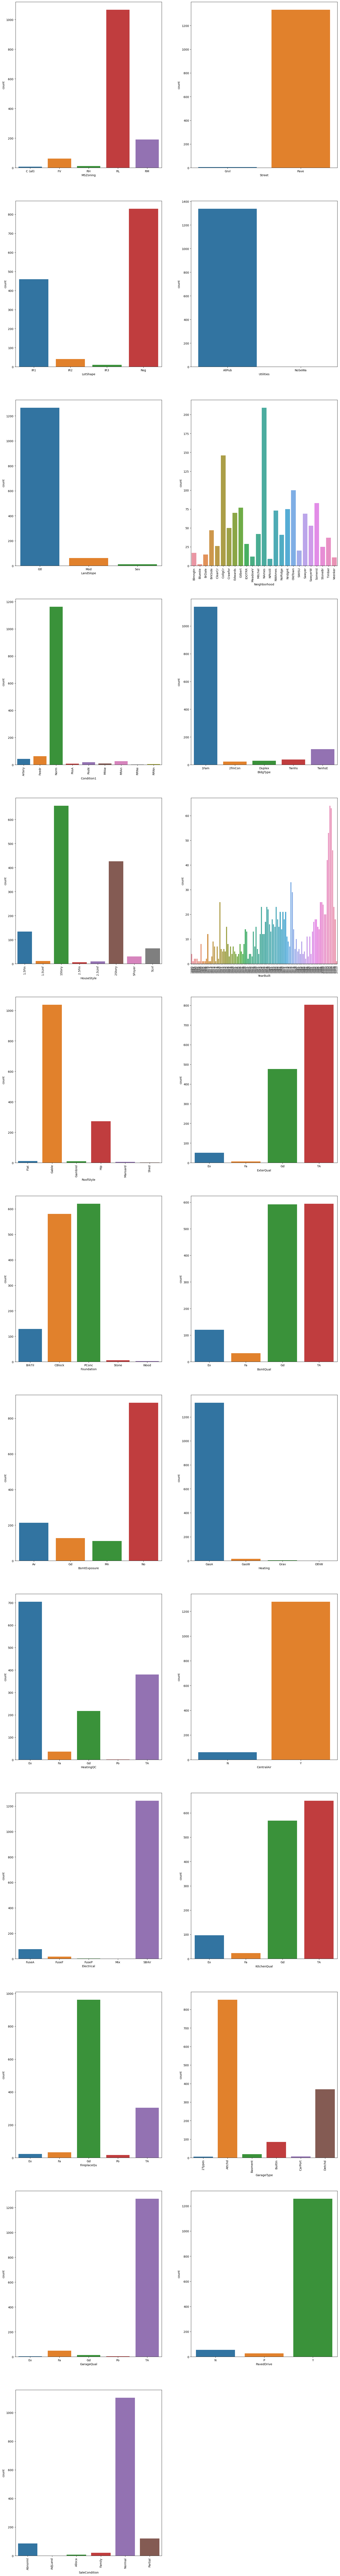

In [1632]:
draw_count_plots(categorical_vars)

#### Insights:
01. MSZoning: RL count is greater than 1000. i.e. most of house belongs to Residential Low Density zone.
02. Street: Most of the properties have Pave type road access.
03. LotShape: Reg > 800 and IR1 > 400. i.e. Most of the properties is regular or slightly irregular.
04. Utilities: Most of the properties have all public Utilities.
05. LandSlope: More than 1200 properties have Gentle slope.
06. Neighborhood: NAmes(North Ames) > 200, CollgCr(College Creek) > 125, OldTown(Old Town) > 100. These are the famouse neighborhood.
07. Condition1: Norm > 1000 i.e. Most of the house are in normal condition.
08. BldgType: 1Farm > 1000 i.e. Most of the properties are of 1Farm type.
09. HouseStyle: 1Story > 600 and 2Story > 400 i.e. Most of the properties are either one story or two story.
10. YearBuilt: Many properties were created in year 2004, 2005, 2006 and 2007.
11. RoofStyle: Gable > 1000 and Hip > 200. i.e. 
12. ExterQual: TA > 700 and Gd > 400 i.e. Most of the properties are either in Average or Good Condition.
13. Foundation: CBlock > 500 and PConc > 600 i.e Most of the properties are either made by cinder block or by poured contrete.
14. BsmtQual: Most of the properties are having Typical or good height of basement i.e between 80 to 99.
15. BsmtExposure: Most of the properties have no exposure to walkout or garden level walls.
16. Heating: GasA > 1200 i.e Most of the properties have Gas forced warm air furnace.
17. HeatingQC: Ex > 700, TA > 300, Gd > 200 i.e. most of the properties are having excellent heating condition.
18. CentralAir: Most of the proprties having central air conditioning.
19. Electrical: Most of the properties having SBrkr (Standard Circuit Breakers & Romex).
20. KitchenQual: Most of the properties having are having either Gd (good) or TA (Average) Kitchen quality.
21. FireplaceQu: Most of the properties having good quality fireplace.
22. GarageType: Attchd > 800 i.e most of the properties having attached garage.
23. GarageQual: Most of the Garage quality is Average. Numbee is TA > 1200.
24. PavedDrive: Most of the properties havinf paved drive. PavedDrive > 1200.
25. SaleCondition: Most of the properties are in noraml sales condition.


In [1633]:
def draw_box_plots(cols):
    plt.figure(figsize=(20, 60))
    index = 1
    for col in cols:
        plt.subplot(8,2,index)
        sns.boxplot(data=hd, x=col)
        index = index + 1
    plt.show()

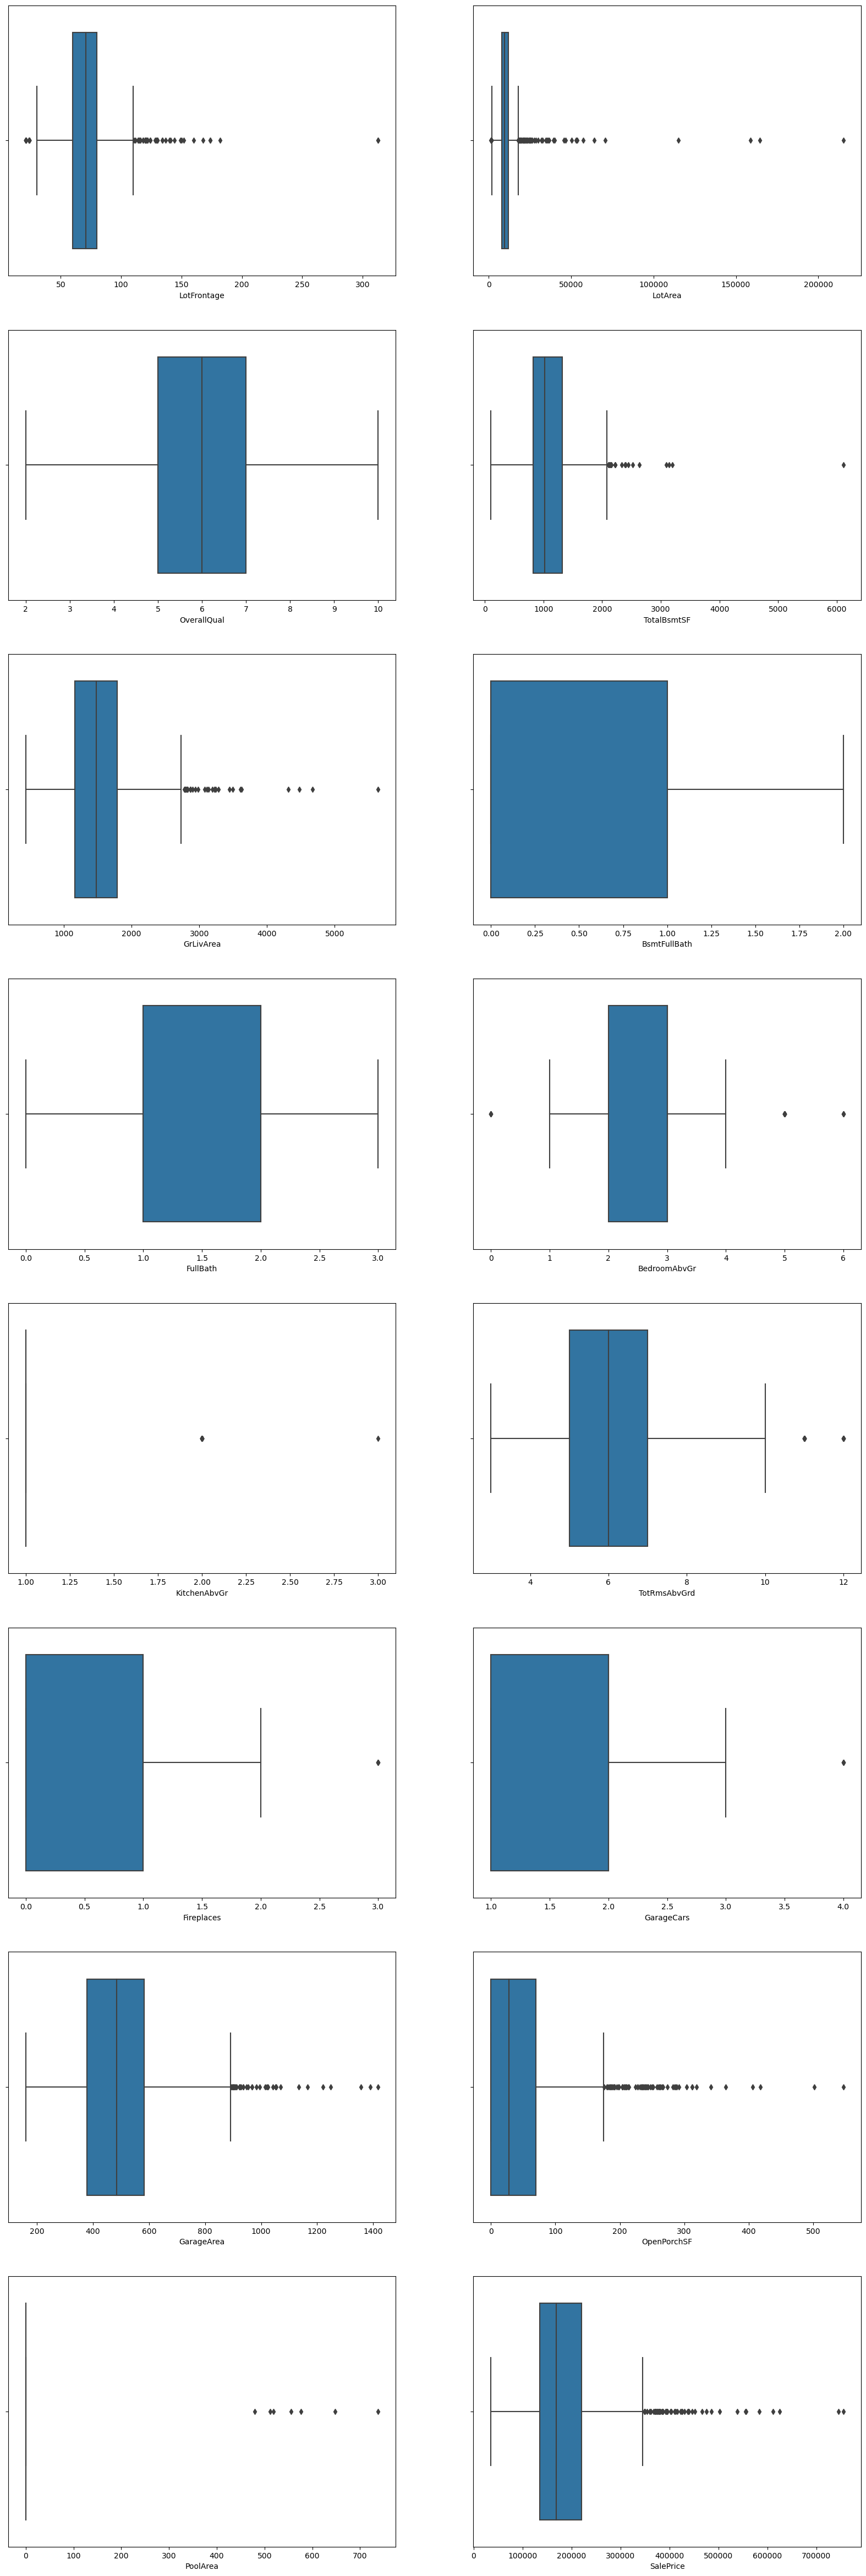

In [1634]:
draw_box_plots(numeric_vars)

#### Insights:
01. LotFrontage: Outlier above 300.
02. LotArea: Outlier above 100000.
03. TotalBsmtSF: Outlier above 6000.
04. GrLivArea: Outlier above 4000.
05. GarageArea: outlier above 1100.
06. OpenPorchSF: Outlier above 400.
07. PoolArea: Outlier above 400.
08. SlaePrice: Outlier above 600000.

### Outlier Treatment

In [1635]:
hd = hd[(hd.LotFrontage < 300)]
hd = hd[(hd.LotArea < 100000)]
hd = hd[(hd.TotalBsmtSF < 100000)]
hd = hd[(hd.GrLivArea < 4000)]
hd = hd[(hd.GarageArea < 1100)]
hd = hd[(hd.OpenPorchSF < 400)]
hd = hd[(hd.PoolArea < 400)]
hd = hd[(hd.SalePrice < 600000)]

In [1636]:
hd.shape

(1313, 41)

In [1637]:
def draw_dist_plots(cols):
    plt.figure(figsize=(20, 60))
    index = 1
    for col in cols:
        plt.subplot(8,2,index)
        sns.distplot(hd[col])
        index = index + 1
    plt.show()

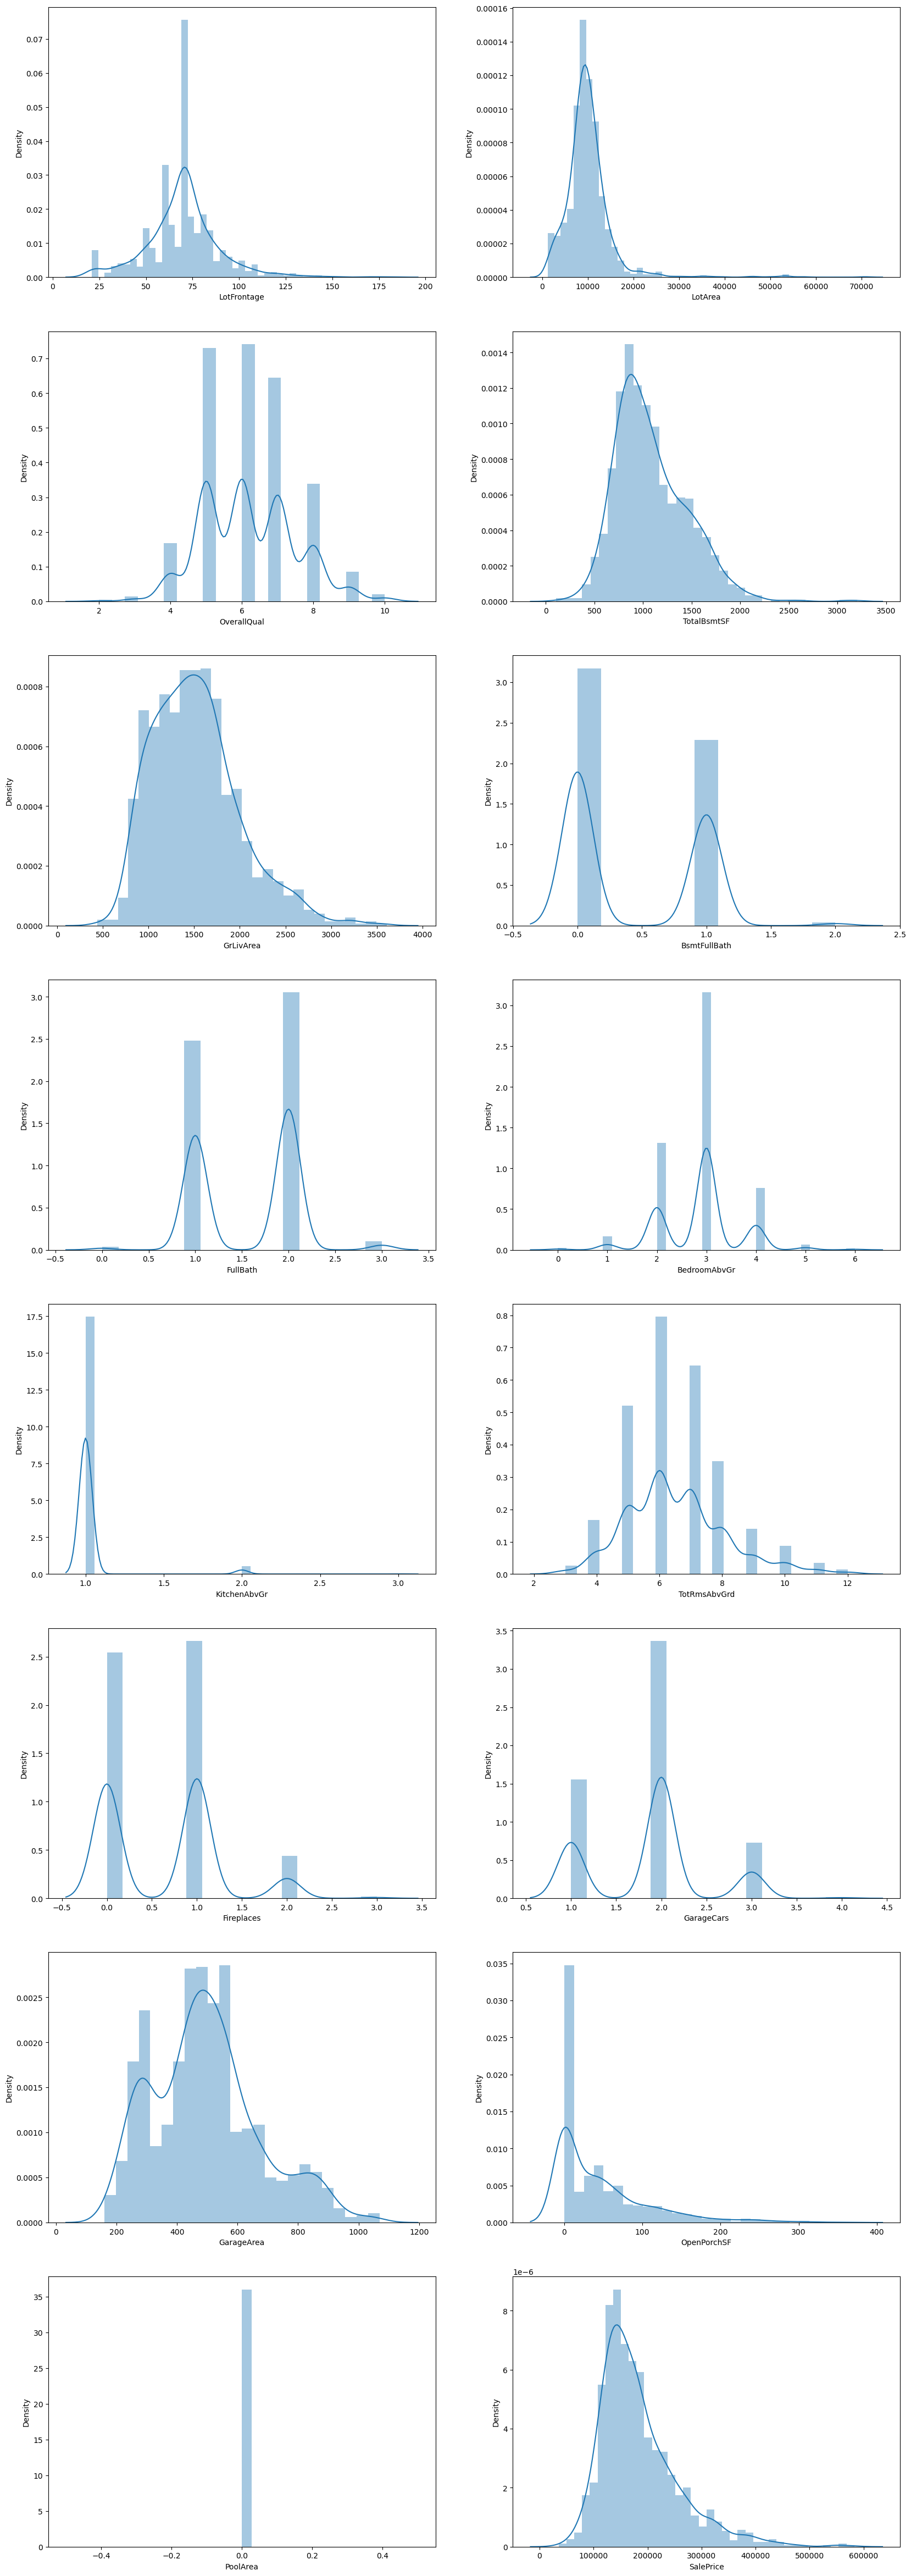

In [1638]:
draw_dist_plots(numeric_vars)

#### Insights:
Distribution for BsmtFullBath, FullBath, Fireplaces and GarageCars are not noraml.

### Bivariate Analysis

There are too many values for YearBuilt column. Lets bucket them for ease of analysis.
1. OLDEST: 1880 - 1950
2. OLD: 1951 - 1990
3. NEW: 1991 - 2010

In [1639]:
hd['PropAge'] = hd.YearBuilt.apply(lambda x: 'OLDEST' if x <= 1950 else 'OLD' if x <= 1990 else 'NEW')
hd['PropAge'] = hd.PropAge.astype('category')

In [1640]:
hd.PropAge.value_counts()

OLD       528
NEW       513
OLDEST    272
Name: PropAge, dtype: int64

In [1641]:
# Lets drop the YearBuilt column. No more required
hd = hd.drop('YearBuilt', axis=1)
categorical_vars = [
    'MSZoning', 'Street', 'LotShape', 'Utilities',
    'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
    'PropAge', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
    'GarageType', 'GarageQual', 'PavedDrive', 'SaleCondition'
]

In [1642]:
hd.shape

(1313, 41)

In [1643]:
def draw_barplot_salesprice_vs_propage(cols):
    plt.figure(figsize=(20, 160))
    index = 1
    for col in cols:
        plt.subplot(13,2,index)
        sns.barplot(data=hd, x='PropAge', y='SalePrice', hue=col)
        index = index + 1
        if hd[col].nunique() > 5:
            plt.xticks(rotation=90)
    plt.show()

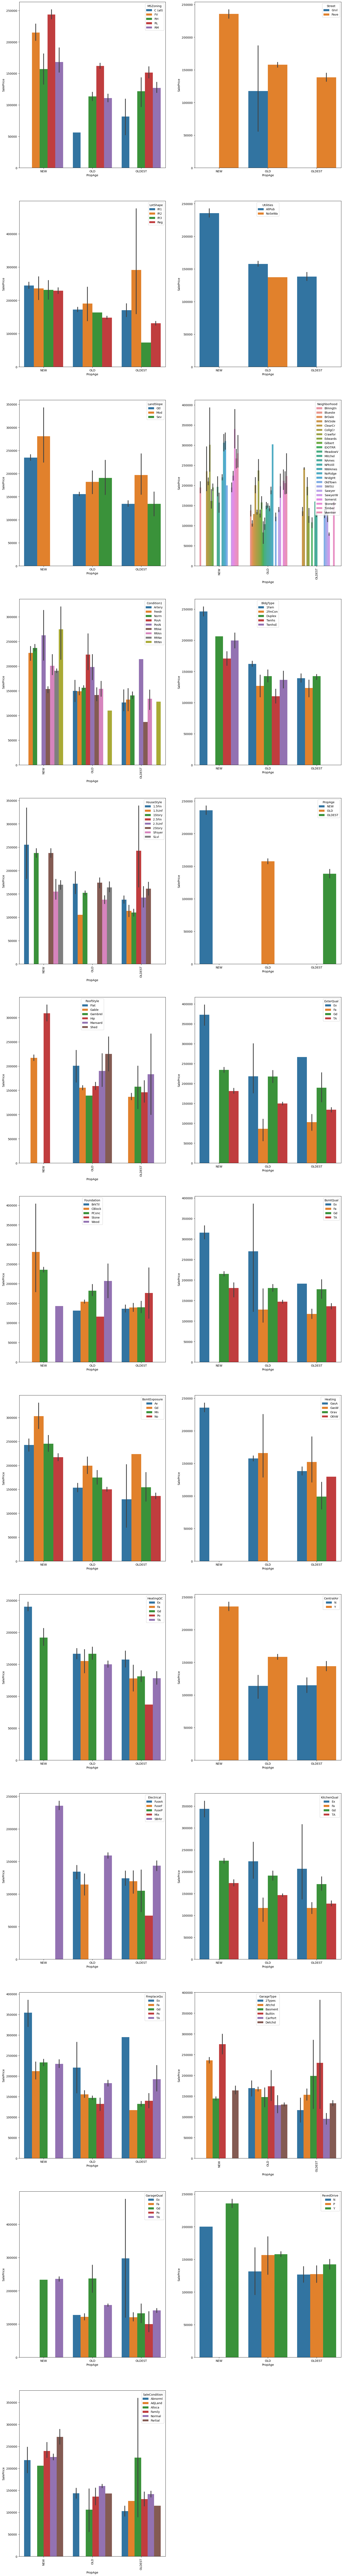

In [1644]:
draw_barplot_salesprice_vs_propage(categorical_vars)

In [1645]:
def draw_boxplot_salesprice_vs_propage(cols):
    plt.figure(figsize=(20, 160))
    index = 1
    for col in cols:
        plt.subplot(13,2,index)
        sns.boxplot(data=hd, x='PropAge', y='SalePrice', hue=col)
        index = index + 1
        if hd[col].nunique() > 5:
            plt.xticks(rotation=90)
    plt.show()

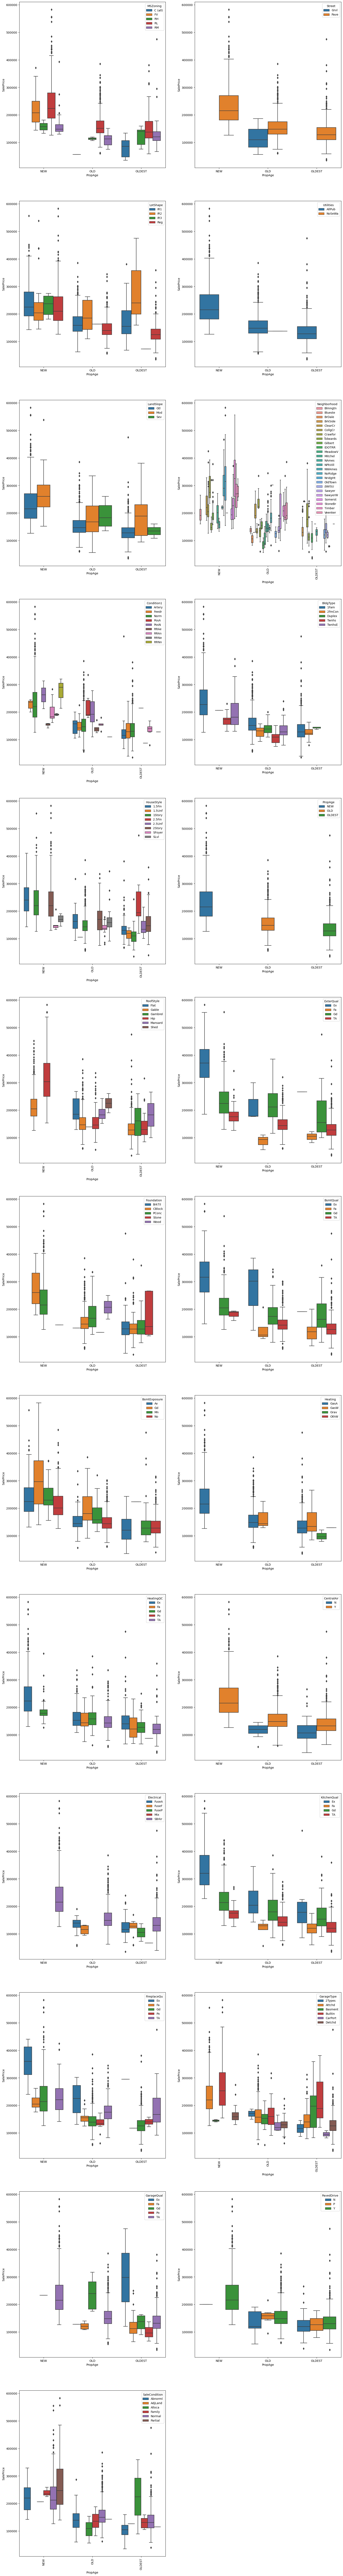

In [1646]:
draw_boxplot_salesprice_vs_propage(categorical_vars)

In [1647]:
# pairplot for continuous data type
# sns.pairplot(hd.select_dtypes(['int64','float64']), diag_kind='kde')
# plt.show()

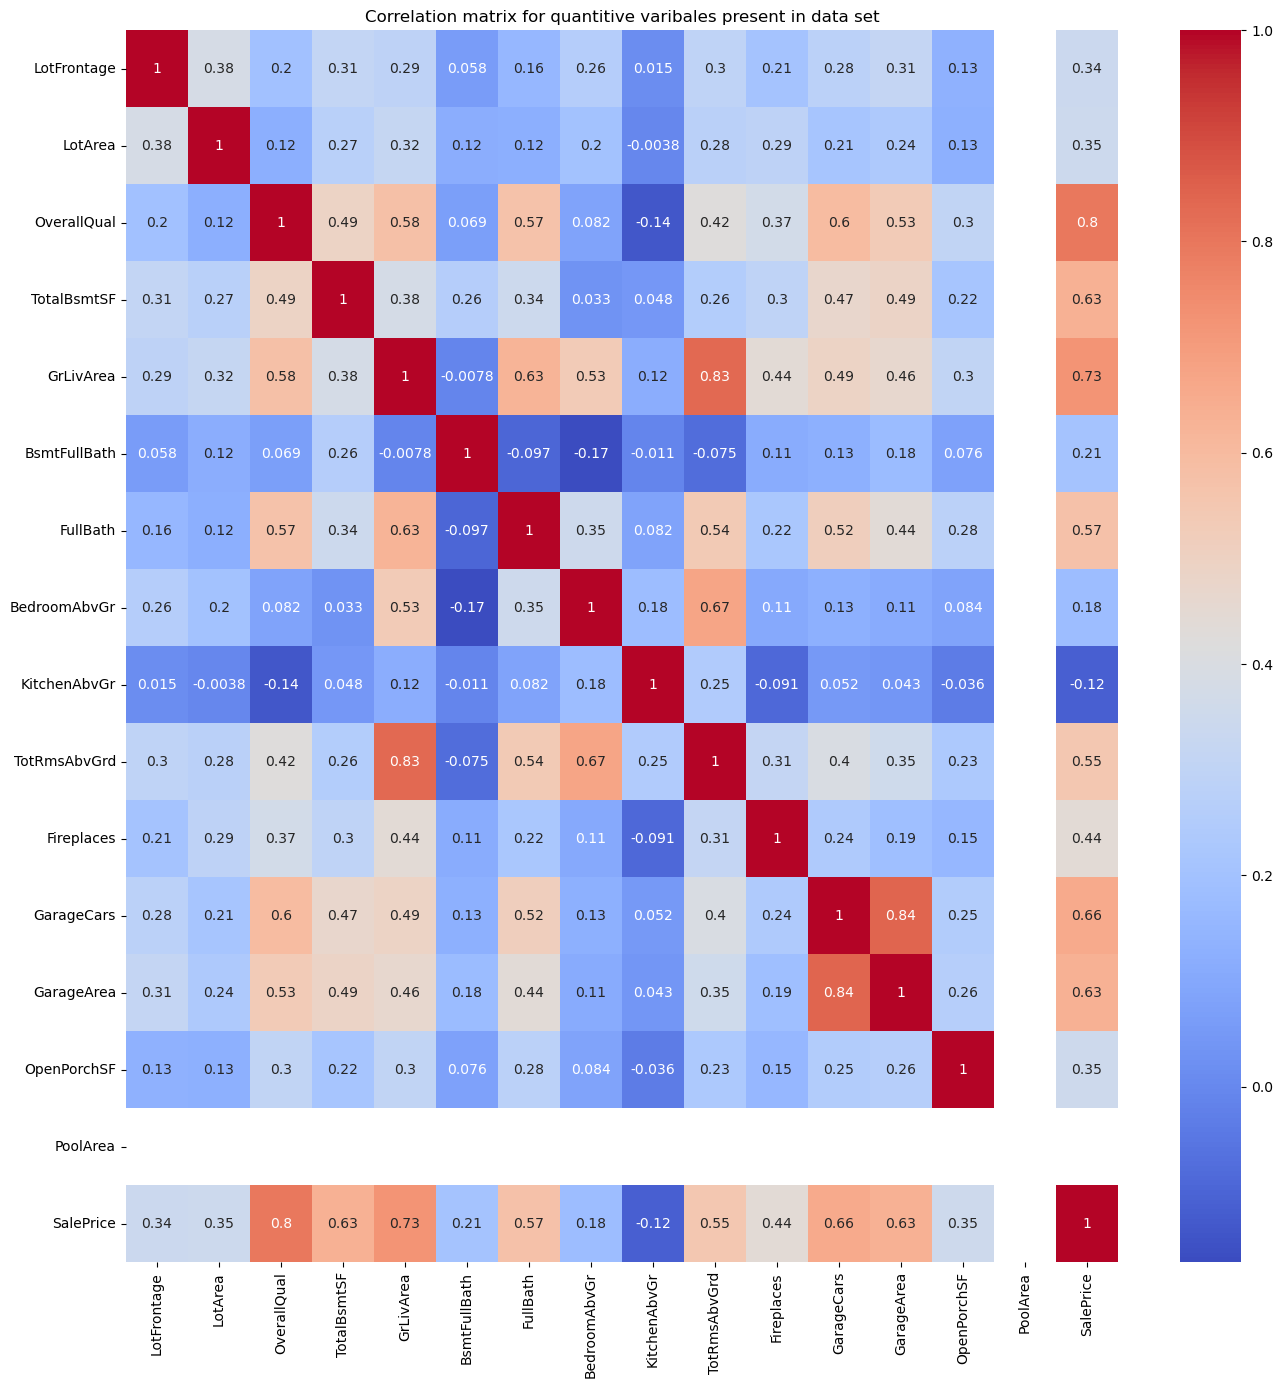

In [1648]:
plt.figure(figsize=(16, 16))
sns.heatmap(data=hd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix for quantitive varibales present in data set')
plt.show()

#### Insights:

We can clearly see some values less than 0 and greater than 0.8. These shows thw high correlation among columns.

Correlation of SlaePrice with independent variables
- SlaePrice highly correlated with OverallQual, KitchenAbvGr

Correlation among independent variables
1. FirePlace is highly correlated with KitchenAbvGr
2. TotRmsAbvGr is highly correlated with GrLivArea and BsmtFullBath
3. KitchenAbvGr is highly correlated with OverallQual
4. BedroomAbvGr is highly correlated with BsmtFullBath

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

### Data Prepration

In [1649]:
hd.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageCars', 'GarageArea', 'GarageQual',
       'PavedDrive', 'OpenPorchSF', 'PoolArea', 'SaleCondition', 'SalePrice',
       'PropAge'],
      dtype='object')

In [1650]:
# split into X and y
X = hd.loc[:, ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageCars', 'GarageArea', 'GarageQual',
       'PavedDrive', 'OpenPorchSF', 'PoolArea', 'SaleCondition',
       'PropAge']] # predictors in variable X

y = hd['SalePrice'] # response variable in Y

In [1651]:
# creating dummy variables for categorical variables

# subset all categorical variables
hd_categorical = X.select_dtypes(include=['category'])
hd_categorical.head()

,MSZoning,Street,LotShape,Utilities,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,ExterQual,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageQual,PavedDrive,SaleCondition,PropAge
0,RL,Pave,Reg,AllPub,Gtl,CollgCr,Norm,1Fam,2Story,Gable,Gd,PConc,Gd,No,GasA,Ex,Y,SBrkr,Gd,Gd,Attchd,TA,Y,Normal,NEW
1,RL,Pave,Reg,AllPub,Gtl,Veenker,Feedr,1Fam,1Story,Gable,TA,CBlock,Gd,Gd,GasA,Ex,Y,SBrkr,TA,TA,Attchd,TA,Y,Normal,OLD
2,RL,Pave,IR1,AllPub,Gtl,CollgCr,Norm,1Fam,2Story,Gable,Gd,PConc,Gd,Mn,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,TA,Y,Normal,NEW
3,RL,Pave,IR1,AllPub,Gtl,Crawfor,Norm,1Fam,2Story,Gable,TA,BrkTil,TA,No,GasA,Gd,Y,SBrkr,Gd,Gd,Detchd,TA,Y,Abnorml,OLDEST
4,RL,Pave,IR1,AllPub,Gtl,NoRidge,Norm,1Fam,2Story,Gable,Gd,PConc,Gd,Av,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,TA,Y,Normal,NEW


In [1652]:
# convert into dummies - one hot encoding
hd_dummies = pd.get_dummies(hd_categorical, drop_first=True)
hd_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_NoSeWa,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PropAge_OLD,PropAge_OLDEST
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [1653]:
# drop categorical variables 
X = X.drop(list(hd_categorical.columns), axis=1)

In [1654]:
# concat dummy variables with X
X = pd.concat([X, hd_dummies], axis=1)

In [1655]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd',
       ...
       'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'PropAge_OLD',
       'PropAge_OLDEST'],
      dtype='object', length=124)

In [1656]:
X.head()

,LotFrontage,LotArea,OverallQual,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,PoolArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_NoSeWa,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PropAge_OLD,PropAge_OLDEST
0,-0.253991,-0.299826,0.621511,-0.613316,0.399079,1.114724,0.799630,0.182027,-0.172861,0.951963,-0.996192,0.221579,0.295113,0.246276,0.0,-0.222622,-0.091916,0.507605,-0.41006,0.047855,-0.167902,-0.078296,0.776643,-0.027608,-0.216909,-0.078296,-0.039058,-0.1075,-0.192678,-0.136452,2.827216,-0.198968,-0.231888,-0.249595,-0.147614,-0.09604,-0.177262,-0.432621,-0.083077,-0.239094,-0.172638,-0.240869,-0.284004,-0.12437,-0.233706,-0.205094,-0.258094,-0.136452,-0.165489,-0.091916,-0.222622,0.383047,-0.073211,-0.114531,-0.087605,-0.136452,-0.039058,-0.061827,-0.12437,-0.147614,-0.172638,-0.305378,-0.091916,-0.982634,-0.067754,-0.083077,1.460702,-0.152914,-0.222622,0.530071,-0.087605,-0.498095,-0.067754,-0.039058,-0.067754,1.339260,-1.236877,-0.873164,1.075171,-0.067754,-0.047855,-0.158052,1.115547,-0.897804,-0.312772,-0.300885,0.702668,-0.103815,-0.047855,-0.027608,-0.165489,-0.441274,-0.027608,-0.629927,0.220731,-0.114531,-0.039058,-0.027608,0.28086,-0.133527,1.161395,-0.979644,-0.158052,0.620501,-0.111068,-0.540669,0.759098,-0.121174,-0.261435,-0.073211,-0.620501,-0.192678,-0.09604,-0.047855,0.228218,-0.144898,0.256411,-0.027608,-0.067754,-0.12437,0.452313,-0.306866,-0.820129,-0.511163
1,0.515538,-0.086145,-0.151258,0.490692,-0.533407,-0.844624,0.799630,0.182027,-0.172861,-0.331989,0.574036,0.221579,-0.200260,-0.760719,0.0,-0.222622,-0.091916,0.507605,-0.41006,0.047855,-0.167902,-0.078296,0.776643,-0.027608,-0.216909,-0.078296,-0.039058,-0.1075,-0.192678,-0.136452,-0.353705,-0.198968,-0.231888,-0.249595,-0.147614,-0.09604,-0.177262,-0.432621,-0.083077,-0.239094,-0.172638,-0.240869,-0.284004,-0.12437,-0.233706,-0.205094,-0.258094,-0.136452,-0.165489,10.879505,4.491928,-2.610647,-0.073211,-0.114531,-0.087605,-0.136452,-0.039058,-0.061827,-0.12437,-0.147614,-0.172638,-0.305378,-0.091916,1.017673,-0.067754,-0.083077,-0.684602,-0.152914,-0.222622,0.530071,-0.087605,-0.498095,-0.067754,-0.039058,-0.067754,-0.746681,0.808488,1.145260,-0.930084,-0.067754,-0.047855,-0.158052,1.115547,-0.897804,3.197

In [1657]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1658]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

### Linear Regression

In [1659]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1660]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

9506327050372.863
[ 6.04737140e+02  7.57653005e+03  1.07513761e+04  9.75644601e+03
  2.42064486e+04  4.93137523e+03  3.06129029e+01 -3.61568287e+03
 -5.03829468e+03  9.12353053e+02  9.35426331e+02  3.39908503e+03
  1.27200584e+03 -6.20039681e+02  8.11368197e+16  7.89235392e+03
  3.96510502e+03  1.19764989e+04  9.00788924e+03  1.34301820e+03
 -2.03845170e+02 -1.17794521e+02  1.63261832e+02  3.45381836e+14
 -8.23756698e+01 -1.86874120e+03  8.61981377e+02  1.39942115e+03
  1.75178970e+03 -1.13972144e+03 -1.35911805e+03  3.98167630e+03
 -3.08247056e+03 -2.21258877e+03  1.33990490e+03  4.61097172e+02
 -1.25444213e+03 -2.93257157e+03  1.62254562e+03 -6.18617298e+02
  4.46396554e+03  5.16650081e+03 -6.51721669e+02  4.30986137e+02
 -1.04651169e+03  1.07356928e+02  1.50347441e+03  4.11943538e+03
 -8.65176281e+02  1.87516200e+03  1.88319487e+01  2.84792544e+03
 -8.23812582e+02  9.90495563e+02 -1.27905559e+03 -2.62781919e+02
  1.40388247e+02  3.55072246e+02 -4.92646826e+02 -1.22874702e+03
 -4.533

In [1661]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)

print('r2_train: ', r2_train_lr)
print('r2_test: ', r2_test_lr)
print('rss_train: ', rss1_lr)
print('rss_test: ', rss2_lr)
print('mse_train: ', mse_train_lr)
print('mse_test: ', mse_test_lr)

r2_train:  0.9282902638109081
r2_test:  -6.032123896213877e+19
rss_train:  314964769544.68286
rss_test:  1.5674677093672794e+32
mse_train:  342725538.13349605
mse_test:  3.978344440018476e+29


#### Residual vs Predictions

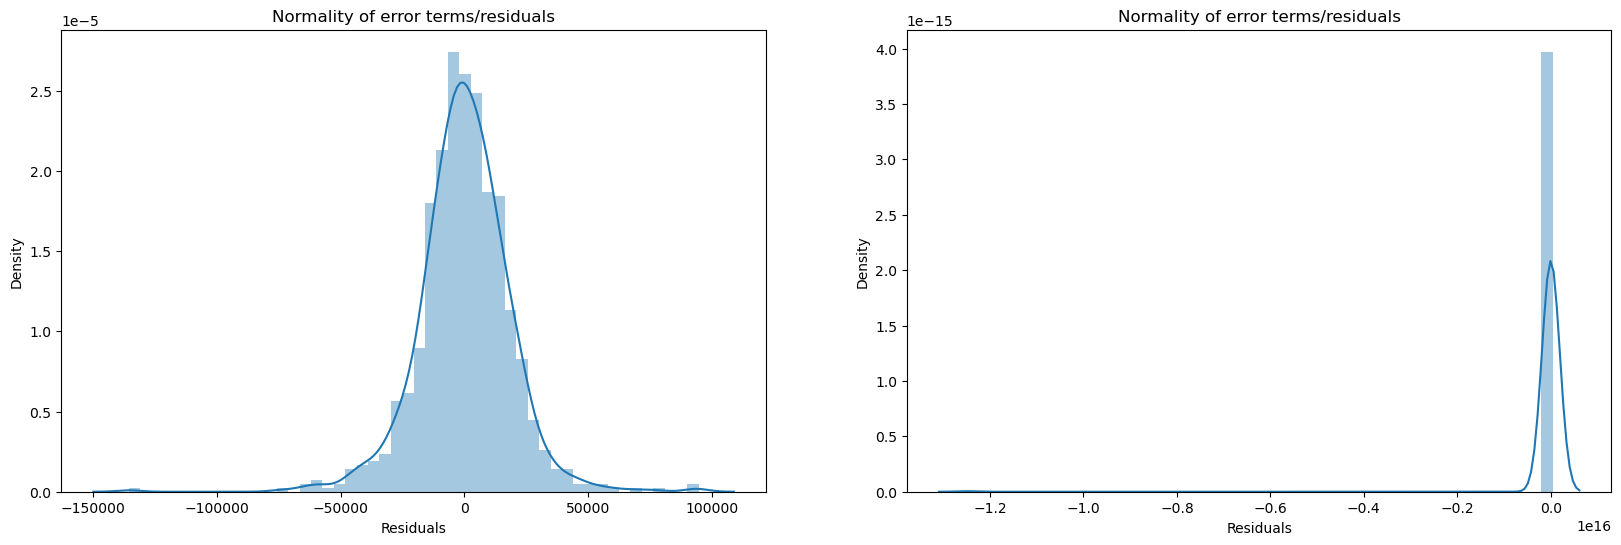

In [1662]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
p = sns.distplot(y_train - y_pred_train, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.subplot(1, 2, 2)
p = sns.distplot(y_test - y_pred_test, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Distributions of error

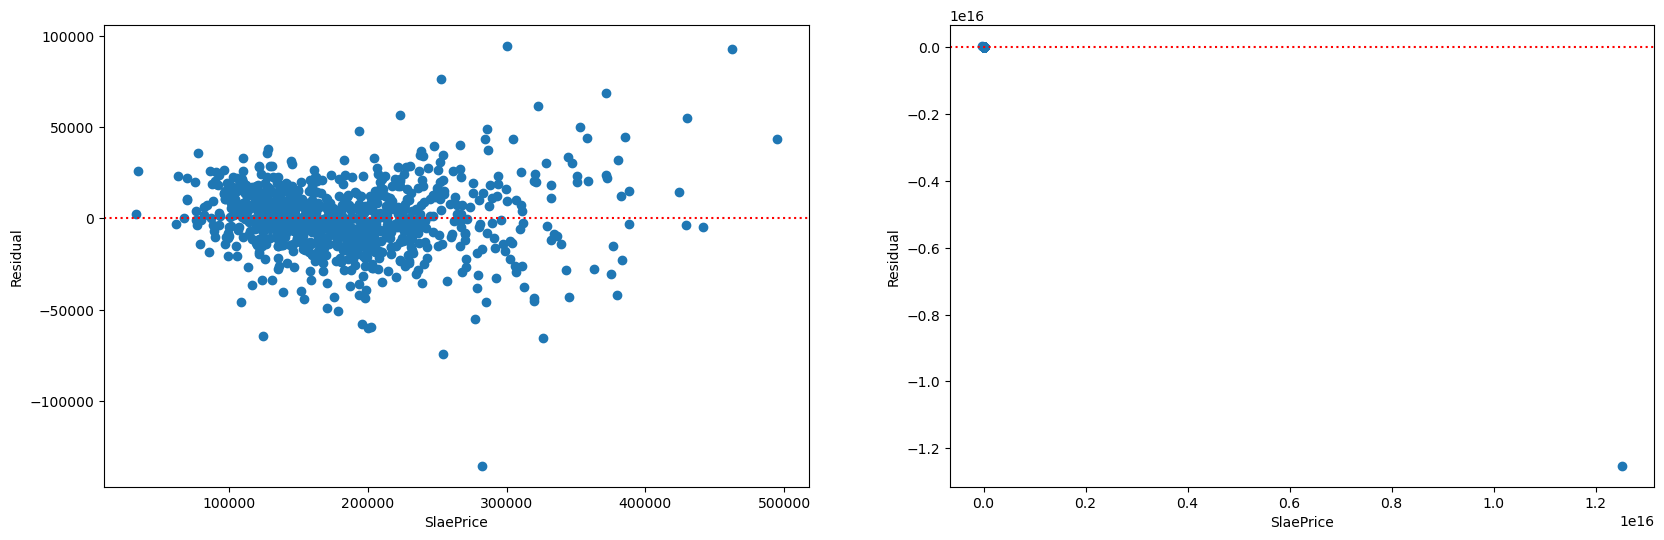

In [1663]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.scatter( y_pred_train , y_train - y_pred_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SlaePrice")
plt.ylabel("Residual")
plt.subplot(1, 2, 2)
plt.scatter( y_pred_test , y_test - y_pred_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SlaePrice")
plt.ylabel("Residual")
plt.show()

#### Linear Regression Insights:

1. Normality of error term is left skewed on test data
2. Unequal variance present
3. Perform well on train data but not on test data. Possible reason could be overfitting.

### Ridge Regression

In [1664]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1665]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [1666]:
#Fitting Ridge model for alpha = 3.0 and printing coefficients which have been penalised
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.67065159e+02  7.43421878e+03  1.09479253e+04  9.98368547e+03
  2.34343606e+04  4.97184351e+03  1.42822753e+02 -3.65758526e+03
 -5.27661709e+03  1.31121850e+03  1.01372551e+03  3.34229165e+03
  1.38028732e+03 -6.05631090e+02  0.00000000e+00  5.22789976e+03
  2.76232504e+03  6.90880534e+03  4.81335191e+03  1.47679097e+03
 -8.35744136e+01 -1.04316559e+02  1.19162668e+02  0.00000000e+00
 -7.62308071e+01 -2.21339882e+03  8.06363640e+02  1.26868568e+03
  1.48638107e+03 -1.21527684e+03 -1.40590800e+03  3.78926884e+03
 -3.18539580e+03 -2.27033037e+03  1.04800302e+03  3.63405588e+02
 -1.33829515e+03 -3.12061779e+03  1.52954737e+03 -7.47189621e+02
  4.49615851e+03  5.24436589e+03 -9.89066284e+02  2.97512285e+02
 -1.14634939e+03  6.77425838e+01  1.45457771e+03  4.14032495e+03
 -9.05004605e+02  1.85061175e+03  2.22692086e+01  2.79485009e+03
 -8.15721872e+02  1.01551749e+03 -1.26429930e+03 -2.74069196e+02
  1.44653981e+02  3.69000976e+02 -4.42903336e+02 -1.14535988e+03
 -4.51996068e+03 -5.23204

In [1667]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

print('r2_train: ', r2_train_lr)
print('r2_test: ', r2_test_lr)
print('rss_train: ', rss1_lr)
print('rss_test: ', rss2_lr)
print('mse_train: ', mse_train_lr)
print('mse_test: ', mse_test_lr)

r2_train:  0.9281288582677512
r2_test:  0.8788713693273947
rss_train:  315673697821.4459
rss_test:  314756826162.59674
mse_train:  343496950.8394406
mse_test:  798875193.3060831


#### Residual vs Predictions

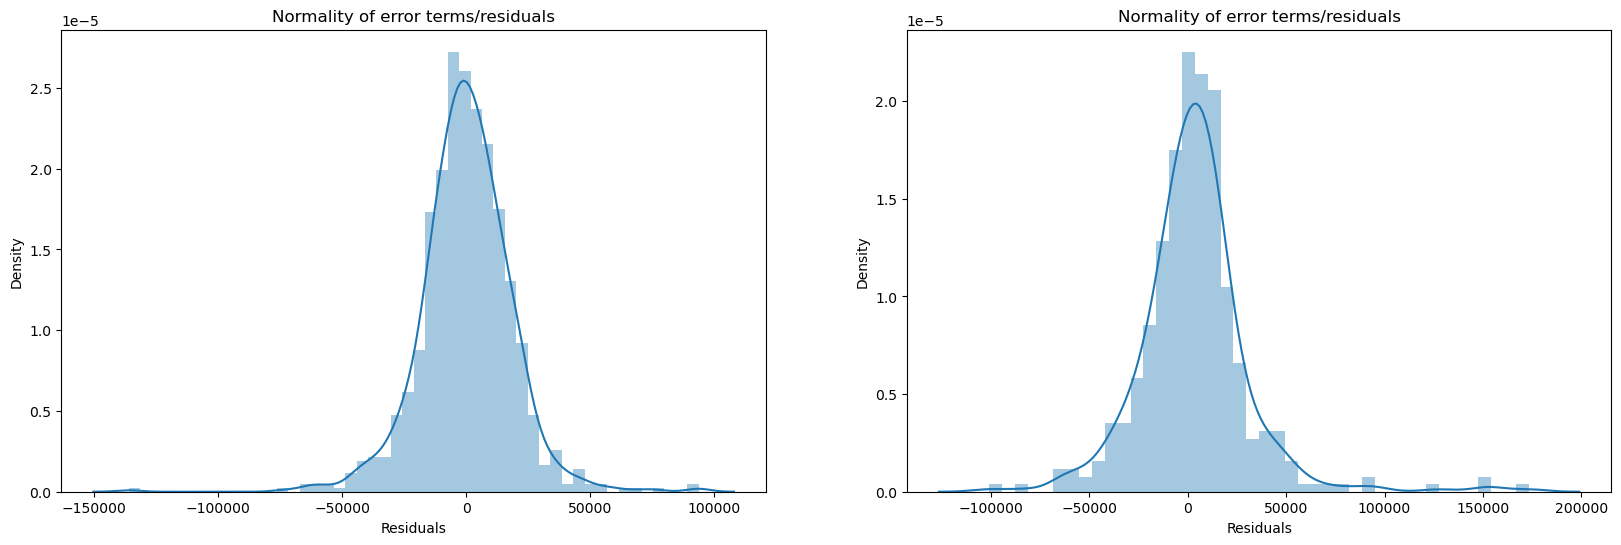

In [1668]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
p = sns.distplot(y_train - y_pred_train, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.subplot(1, 2, 2)
p = sns.distplot(y_test - y_pred_test, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Distributions of error

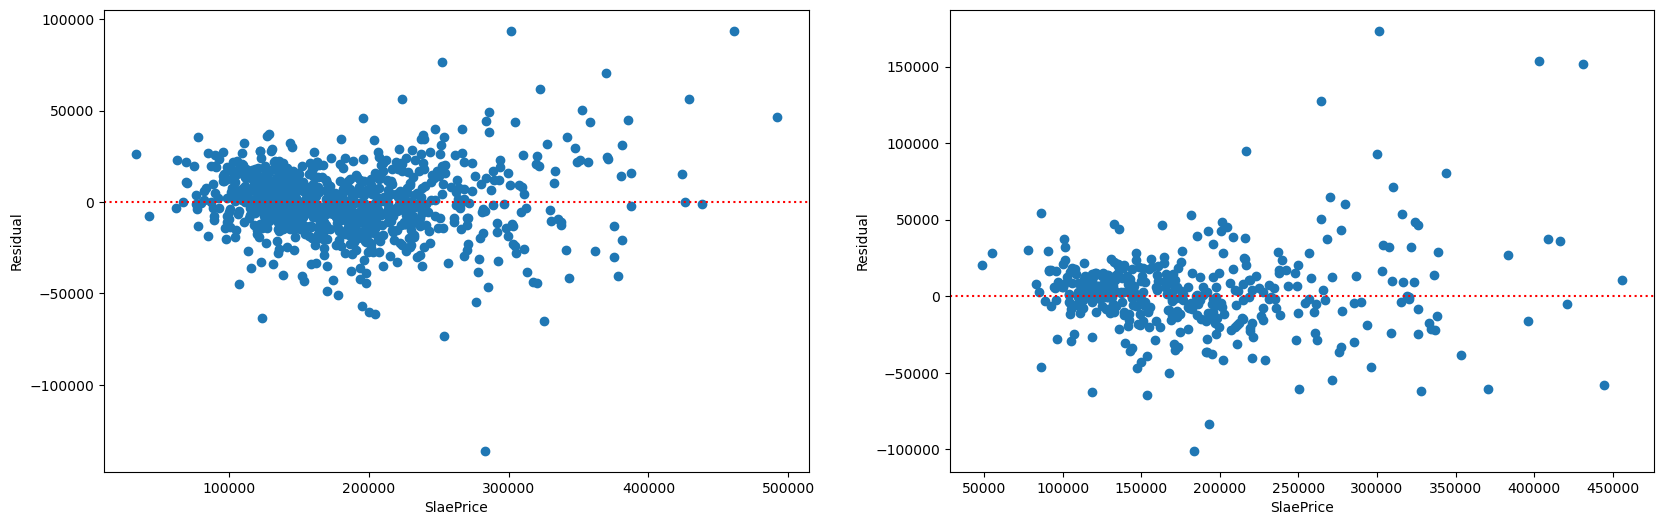

In [1669]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.scatter( y_pred_train , y_train - y_pred_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SlaePrice")
plt.ylabel("Residual")
plt.subplot(1, 2, 2)
plt.scatter( y_pred_test , y_test - y_pred_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SlaePrice")
plt.ylabel("Residual")
plt.show()

### Double the value of alpha to 6

In [1670]:
#Fitting Ridge model for alpha = 6.0 and printing coefficients which have been penalised
alphaDoubleRidge = 6.0
ridgeDouble = Ridge(alpha=alphaDoubleRidge)

ridgeDouble.fit(X_train, y_train)
print(ridge.coef_)

[ 6.67065159e+02  7.43421878e+03  1.09479253e+04  9.98368547e+03
  2.34343606e+04  4.97184351e+03  1.42822753e+02 -3.65758526e+03
 -5.27661709e+03  1.31121850e+03  1.01372551e+03  3.34229165e+03
  1.38028732e+03 -6.05631090e+02  0.00000000e+00  5.22789976e+03
  2.76232504e+03  6.90880534e+03  4.81335191e+03  1.47679097e+03
 -8.35744136e+01 -1.04316559e+02  1.19162668e+02  0.00000000e+00
 -7.62308071e+01 -2.21339882e+03  8.06363640e+02  1.26868568e+03
  1.48638107e+03 -1.21527684e+03 -1.40590800e+03  3.78926884e+03
 -3.18539580e+03 -2.27033037e+03  1.04800302e+03  3.63405588e+02
 -1.33829515e+03 -3.12061779e+03  1.52954737e+03 -7.47189621e+02
  4.49615851e+03  5.24436589e+03 -9.89066284e+02  2.97512285e+02
 -1.14634939e+03  6.77425838e+01  1.45457771e+03  4.14032495e+03
 -9.05004605e+02  1.85061175e+03  2.22692086e+01  2.79485009e+03
 -8.15721872e+02  1.01551749e+03 -1.26429930e+03 -2.74069196e+02
  1.44653981e+02  3.69000976e+02 -4.42903336e+02 -1.14535988e+03
 -4.51996068e+03 -5.23204

In [1671]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

metric22 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric22.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric22.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric22.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric22.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric22.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric22.append(mse_test_lr**0.5)

print('r2_train: ', r2_train_lr)
print('r2_test: ', r2_test_lr)
print('rss_train: ', rss1_lr)
print('rss_test: ', rss2_lr)
print('mse_train: ', mse_train_lr)
print('mse_test: ', mse_test_lr)

r2_train:  0.9278579132243858
r2_test:  0.8793047306664795
rss_train:  316863747425.2794
rss_test:  313630722128.27844
mse_train:  344791890.56069577
mse_test:  796017061.2392853


### Lasso Regression

In [1672]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1673]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1674]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100
lasso = Lasso(alpha=alpha)    
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [1675]:
print(lasso.coef_)

[ 5.87662621e+02  6.93778588e+03  1.15724748e+04  1.03145355e+04
  2.34426322e+04  4.90142410e+03  0.00000000e+00 -3.51480496e+03
 -5.74699473e+03  1.05743300e+03  1.01852250e+03  3.15886191e+03
  1.54010140e+03 -4.01831003e+02  0.00000000e+00  1.55341928e+03
  9.71287968e+02  4.93243127e+02 -0.00000000e+00  1.66339368e+03
  8.65328931e+01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.69693896e+03  5.82206538e+02  1.00061782e+03
  1.23935038e+03 -8.23709409e+02 -2.82997685e+02  3.89063578e+03
 -2.65311673e+03 -1.33830982e+03  6.63807657e+02  1.46446503e+02
 -7.52236043e+02 -2.14778962e+03  1.45661654e+03 -8.50202321e+01
  4.88680262e+03  6.03989030e+03 -1.27083918e+03  1.03110784e+02
 -4.59441875e+02  4.90644748e+02  2.11569115e+03  4.48023306e+03
 -3.12765706e+02  2.01929746e+03  0.00000000e+00  2.61350974e+03
 -7.17771349e+02  8.55213864e+02 -1.04631889e+03 -2.47154410e+02
  2.61702752e+01  2.37920674e+02 -1.20681294e+02 -7.35418511e+02
 -4.14597092e+03 -4.82689

In [1676]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)

print('r2_train: ', r2_train_lr)
print('r2_test: ', r2_test_lr)
print('rss_train: ', rss1_lr)
print('rss_test: ', rss2_lr)
print('mse_train: ', mse_train_lr)
print('mse_test: ', mse_test_lr)

r2_train:  0.9266147678993755
r2_test:  0.8803521000590309
rss_train:  322323912273.3268
rss_test:  310909097488.5155
mse_train:  350733310.41711295
mse_test:  789109384.488618


#### Residual vs Predictions

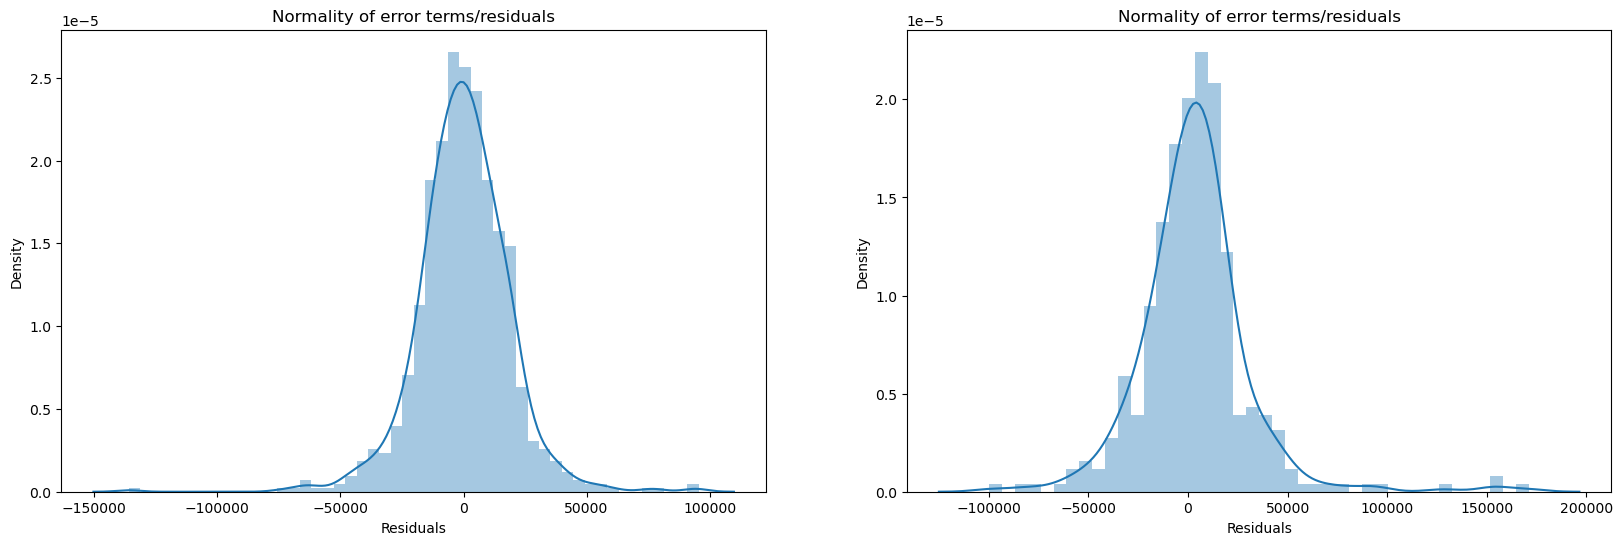

In [1677]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
p = sns.distplot(y_train - y_pred_train, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.subplot(1, 2, 2)
p = sns.distplot(y_test - y_pred_test, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Distributions of error

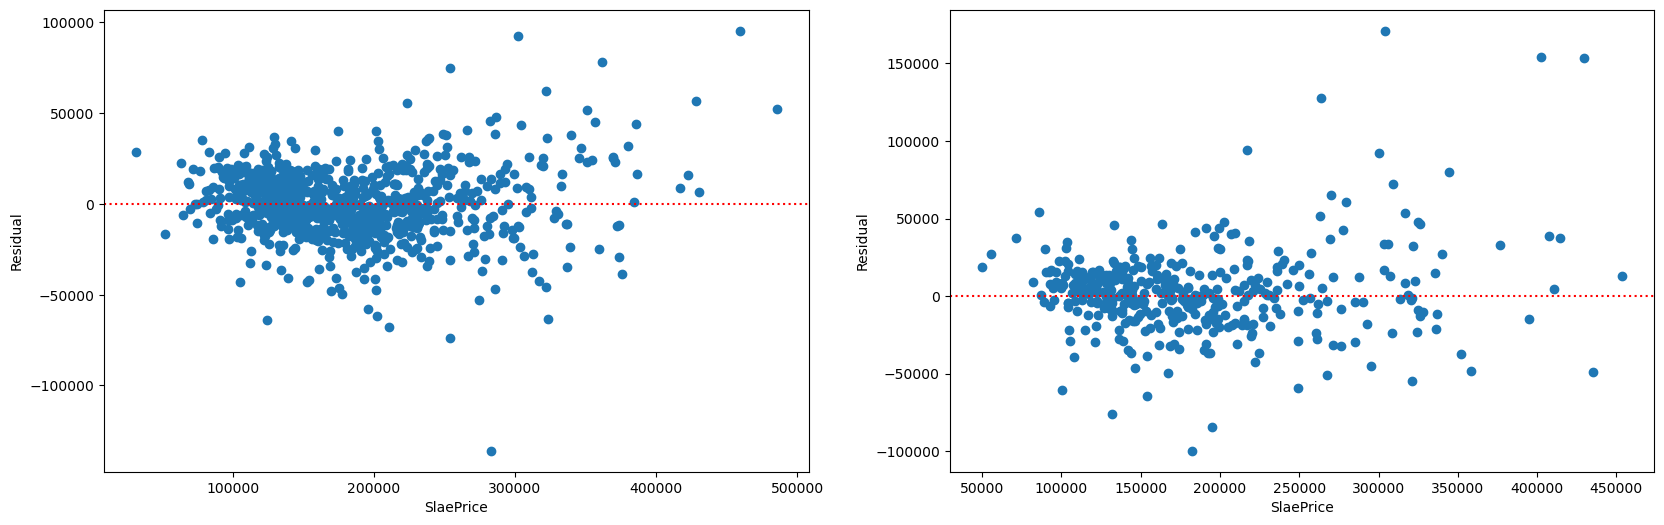

In [1678]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.scatter( y_pred_train , y_train - y_pred_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SlaePrice")
plt.ylabel("Residual")
plt.subplot(1, 2, 2)
plt.scatter( y_pred_test , y_test - y_pred_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SlaePrice")
plt.ylabel("Residual")
plt.show()

### Double the value of alpha to 200

In [1679]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised

alphaDoubleLasso =200
lassoDouble = Lasso(alpha=alphaDoubleLasso)    
lassoDouble.fit(X_train, y_train)

Lasso(alpha=200)

In [1680]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

metric33 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric33.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric33.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric33.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric33.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric33.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric33.append(mse_test_lr**0.5)

print('r2_train: ', r2_train_lr)
print('r2_test: ', r2_test_lr)
print('rss_train: ', rss1_lr)
print('rss_test: ', rss2_lr)
print('mse_train: ', mse_train_lr)
print('mse_test: ', mse_test_lr)

r2_train:  0.9241127801289116
r2_test:  0.8827945151120988
rss_train:  333313187139.0125
rss_test:  304562399717.66956
mse_train:  362691172.0772715
mse_test:  773001014.5118517


In [1681]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression(3)')
rg_metric2 = pd.Series(metric22, name = 'Ridge Regression(6)')
ls_metric = pd.Series(metric3, name = 'Lasso Regression(100)')
ls_metric2 = pd.Series(metric33, name = 'Lasso Regression(200)')

final_metric = pd.concat([lr_metric, rg_metric, rg_metric2, ls_metric, ls_metric2], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression(3),Ridge Regression(6),Lasso Regression(100),Lasso Regression(200)
0,R2 Score (Train),9.282903e-01,9.281289e-01,9.278579e-01,9.266148e-01,9.241128e-01
1,R2 Score (Test),-6.032124e+19,8.788714e-01,8.793047e-01,8.803521e-01,8.827945e-01
2,RSS (Train),3.149648e+11,3.156737e+11,3.168637e+11,3.223239e+11,3.333132e+11
3,RSS (Test),1.567468e+32,3.147568e+11,3.136307e+11,3.109091e+11,3.045624e+11
4,MSE (Train),1.851285e+04,1.853367e+04,1.856857e+04,1.872788e+04,1.904445e+04
5,MSE (Test),6.307412e+14,2.826438e+04,2.821377e+04,2.809109e+04,2.780290e+04


### Lets observe the changes in the coefficients after regularization

In [1682]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge(3)'] = ridge.coef_
betas['Ridge(6)'] = ridgeDouble.coef_
betas['Lasso(100)'] = lasso.coef_
betas['Lasso(200)'] = lassoDouble.coef_
betas

,Linear,Ridge(3),Ridge(6),Lasso(100),Lasso(200)
LotFrontage,6.047371e+02,667.065159,707.345977,587.662621,500.883907
LotArea,7.576530e+03,7434.218782,7344.988551,6937.785882,6653.491310
OverallQual,1.075138e+04,10947.925302,11085.181237,11572.474756,12184.867158
TotalBsmtSF,9.756446e+03,9983.685473,10178.006566,10314.535511,10833.846186
GrLivArea,2.420645e+04,23434.360603,22751.803929,23442.632217,23026.851354
BsmtFullBath,4.931375e+03,4971.843515,5001.176775,4901.424103,4864.987992
FullBath,3.061290e+01,142.822753,245.374888,0.000000,-0.000000
BedroomAbvGr,-3.615683e+03,-3657.585256,-3668.458174,-3514.804961,-3286.919931
KitchenAbvGr,-5.038295e+03,-5276.617094,-5381.733977,-5746.994730,-5780.880095
TotRmsAbvGrd,9.123531e+02,1311.218502,1646.022990,1057.432999,909.336545


### Number of Feature

In [1683]:
features = pd.DataFrame(index=[0])
features['Ridge(3)'] = len(betas['Ridge(3)'])
features['Ridge(6)'] = len(betas['Ridge(6)'])
features['Lasso(100)'] = len(list(filter(lambda x: abs(x) != 0, betas['Lasso(100)'])))
features['Lasso(200)'] = len(list(filter(lambda x: abs(x) != 0, betas['Lasso(200)'])))
features

,Ridge(3),Ridge(6),Lasso(100),Lasso(200)
0,124,124,108,99


## Recomendations

1. R2 Score for Lasso Regression is 9.266148e-01(train) and 8.803521e-01(test). Lasso Regression Model is best for interpretation.
2. Top 10 feature from Lasso comes out as below

In [1684]:
print(betas['Lasso(100)'].sort_values(ascending=False).head(10))

GrLivArea               23442.632217
OverallQual             11572.474756
TotalBsmtSF             10314.535511
LotArea                  6937.785882
Neighborhood_NridgHt     6039.890296
BsmtFullBath             4901.424103
Neighborhood_NoRidge     4886.802620
BsmtExposure_Gd          4799.139332
Neighborhood_StoneBr     4480.233061
Neighborhood_Crawfor     3890.635784
Name: Lasso(100), dtype: float64


    2.1. Living area on ground floor, overall quality of material and finish, basement area, lot area are the significant factory for sale price of peoperty.
    2.2. Specific Neighborhood also play a critical role (Northridge, Northridge Heights, Stone Brook and Crawford)
    2.3. Basement full bathroom and good basement exposure are also critical to predict sale price.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 

In [1685]:
removed_cols = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'LotArea', 'Neighborhood_NridgHt']
X_train = X_train.drop(removed_cols, axis=1)
X_test = X_test.drop(removed_cols, axis=1)


In [1686]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1687]:
print(model_cv.best_params_)

{'alpha': 100}


In [1688]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100
lasso = Lasso(alpha=alpha)    
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [1689]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)

print('r2_train: ', r2_train_lr)
print('r2_test: ', r2_test_lr)
print('rss_train: ', rss1_lr)
print('rss_test: ', rss2_lr)
print('mse_train: ', mse_train_lr)
print('mse_test: ', mse_test_lr)

r2_train:  0.8807611882992759
r2_test:  0.8465225189695631
rss_train:  523722814278.2263
rss_test:  398816403259.2827
mse_train:  569883367.005687
mse_test:  1012224373.7545247


In [1690]:
cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd',
       ...
       'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'PropAge_OLD',
       'PropAge_OLDEST'],
      dtype='object', length=124)

In [1691]:
cols = list(filter(lambda x: x not in removed_cols, list(cols)))

In [1692]:
betas = pd.DataFrame(index=cols)
betas.rows = cols
betas['Lasso(100)'] = lasso.coef_
betas

,Lasso(100)
LotFrontage,2374.916649
BsmtFullBath,6014.309438
FullBath,7690.598467
BedroomAbvGr,-3152.316189
KitchenAbvGr,-7125.608210
TotRmsAbvGrd,16416.340816
Fireplaces,7581.091049
GarageCars,3645.491479
GarageArea,7866.902716
OpenPorchSF,931.603370


In [1693]:
print(betas['Lasso(100)'].sort_values(ascending=False).head())

TotRmsAbvGrd            16416.340816
GarageArea               7866.902716
FullBath                 7690.598467
Fireplaces               7581.091049
Neighborhood_NoRidge     7271.645043
Name: Lasso(100), dtype: float64
